# ASSOCIATION RULE MINING

## Original Data

### Data Preprocessing

In [2]:
#Importing the needed dependency
import pandas as pd
import matplotlib.pyplot as plt
#Load data
dataset = pd.read_csv('Credit1.csv')
dataset

,Checking Acct,Credit Hist,Purpose,Savings Acct,Employment,Gender,Marital Status,Housing,Job,Telephone,Foreign,Age,Credit Standing
0,0Balance,Current,Small Appliance,Low,Short,M,Single,Own,Unskilled,Yes,Yes,23,Good
1,0Balance,Current,Furniture,MedLow,Unemployed,M,Divorced,Own,Skilled,Yes,Yes,32,Bad
2,No Acct,Bank Paid,Car New,Low,Long,M,Single,Own,Management,No,Yes,38,Bad
3,Low,Current,Furniture,Low,Short,M,Single,Own,Unskilled,Yes,Yes,36,Bad
4,Low,Delay,Education,MedLow,Medium,M,Single,Rent,Skilled,No,Yes,31,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,No Acct,Critical,Small Appliance,No Acct,Long,M,Single,Other,Skilled,Yes,Yes,35,Good
421,0Balance,Current,Furniture,No Acct,Long,M,Single,Own,Skilled,Yes,Yes,30,Bad
422,0Balance,Current,Car New,No Acct,Long,F,Divorced,Own,Skilled,Yes,Yes,28,Bad
423,0Balance,Current,Car New,Low,Short,F,Divorced,Own,Skilled,No,Yes,28,Bad


In [3]:
if dataset.isnull().values.any():
    print("!! THERE IS/ARE EMPTY VALUES !! \n")
    # Check for missing values in each column
    null_columns = dataset.columns[dataset.isnull().any()]

    # Print the column names with missing values
    print("Columns with missing values:", null_columns)

    # Check for missing values in each row
    null_rows = dataset[dataset.isnull().any(axis=1)]

    # Print the row indices with missing values
    print("Rows with missing values:\n", null_rows)
    
else:
    print("There are no missing values anymore.")

!! THERE IS/ARE EMPTY VALUES !! 

Columns with missing values: Index(['Gender'], dtype='object')
Rows with missing values:
     Checking Acct Credit Hist  Purpose Savings Acct Employment Gender  \
104          High     Current  Car New          Low     Medium    NaN   

    Marital Status Housing      Job Telephone Foreign  Age Credit Standing  
104         Single   Other  Skilled       Yes     Yes   37             Bad  


In [4]:
#One missing value in Gender column. But since it is not included in the data we need, 
#we will fill it with random values of attributes in Gender.
df = dataset.copy()
df = df.fillna('F')

# Checking again for empty values
if df.isnull().values.any():
    print("!! THERE IS/ARE STILL EMPTY VALUES !! \n")
    null_columns1 = df.columns[df.isnull().any()]
    null_rows1 = df[df.isnull().any(axis=1)]
    print("Columns with missing values:", null_columns1)
    print("Rows with missing values:\n", null_rows1)
else:
    print("There are no missing values anymore :)")


There are no missing values anymore :)


In [5]:
df = df.rename(columns={'Checking Acct':'CheckingAcct',
                              'Credit Hist':'CreditHist',
                              'Savings Acct':'SavingsAcct',
                              'Marital Status':'MaritalStatus',
                              'Credit Standing':'CreditStanding'
                              })
df

,CheckingAcct,CreditHist,Purpose,SavingsAcct,Employment,Gender,MaritalStatus,Housing,Job,Telephone,Foreign,Age,CreditStanding
0,0Balance,Current,Small Appliance,Low,Short,M,Single,Own,Unskilled,Yes,Yes,23,Good
1,0Balance,Current,Furniture,MedLow,Unemployed,M,Divorced,Own,Skilled,Yes,Yes,32,Bad
2,No Acct,Bank Paid,Car New,Low,Long,M,Single,Own,Management,No,Yes,38,Bad
3,Low,Current,Furniture,Low,Short,M,Single,Own,Unskilled,Yes,Yes,36,Bad
4,Low,Delay,Education,MedLow,Medium,M,Single,Rent,Skilled,No,Yes,31,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,No Acct,Critical,Small Appliance,No Acct,Long,M,Single,Other,Skilled,Yes,Yes,35,Good
421,0Balance,Current,Furniture,No Acct,Long,M,Single,Own,Skilled,Yes,Yes,30,Bad
422,0Balance,Current,Car New,No Acct,Long,F,Divorced,Own,Skilled,Yes,Yes,28,Bad
423,0Balance,Current,Car New,Low,Short,F,Divorced,Own,Skilled,No,Yes,28,Bad


In [6]:
#Creating new data as base data
initial_data = df.copy()

#Combining CheckingAcct, CreditHist, and Purpose in a new column
combine_columns = lambda row: f"{row['Employment']} {row['SavingsAcct']}" #This is to help count the frequency of the antecedent
initial_data['Employment_SavingsAcct'] = initial_data.apply(combine_columns, axis=1)
initial_data

,CheckingAcct,CreditHist,Purpose,SavingsAcct,Employment,Gender,MaritalStatus,Housing,Job,Telephone,Foreign,Age,CreditStanding,Employment_SavingsAcct
0,0Balance,Current,Small Appliance,Low,Short,M,Single,Own,Unskilled,Yes,Yes,23,Good,Short Low
1,0Balance,Current,Furniture,MedLow,Unemployed,M,Divorced,Own,Skilled,Yes,Yes,32,Bad,Unemployed MedLow
2,No Acct,Bank Paid,Car New,Low,Long,M,Single,Own,Management,No,Yes,38,Bad,Long Low
3,Low,Current,Furniture,Low,Short,M,Single,Own,Unskilled,Yes,Yes,36,Bad,Short Low
4,Low,Delay,Education,MedLow,Medium,M,Single,Rent,Skilled,No,Yes,31,Good,Medium MedLow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,No Acct,Critical,Small Appliance,No Acct,Long,M,Single,Other,Skilled,Yes,Yes,35,Good,Long No Acct
421,0Balance,Current,Furniture,No Acct,Long,M,Single,Own,Skilled,Yes,Yes,30,Bad,Long No Acct
422,0Balance,Current,Car New,No Acct,Long,F,Divorced,Own,Skilled,Yes,Yes,28,Bad,Long No Acct
423,0Balance,Current,Car New,Low,Short,F,Divorced,Own,Skilled,No,Yes,28,Bad,Short Low


### Data Consolidation and Calculating Frequencies

Following the rule: Employment, SavingsAccount => Credit Standing, we arrive at the following unique rules and their frequency

In [37]:
#Generating unique rules and their frequency (Count)
cons_data = initial_data[['Employment_SavingsAcct', 'CreditStanding']].value_counts().reset_index(name='Count')
cons_data

,Employment_SavingsAcct,CreditStanding,Count
0,Short Low,Bad,48
1,Short Low,Good,42
2,Very Short Low,Bad,35
3,Long Low,Bad,35
4,Long Low,Good,27
5,Medium Low,Good,25
6,Medium Low,Bad,24
7,Very Short Low,Good,23
8,Short No Acct,Good,15
9,Long No Acct,Good,14


In [8]:
#Counting the frequency of unique antecedents (Total) from the base data
unique_count = []

for i in cons_data['Employment_SavingsAcct']:
    is_unique = initial_data['Employment_SavingsAcct'] == f"{i}"
    count = len(initial_data[is_unique])
    unique_count.append(count)
unique_count
cons_data['Total'] = unique_count

cons_data = cons_data[['Employment_SavingsAcct', 'Total', 'CreditStanding', 'Count']]
cons_data

,Employment_SavingsAcct,Total,CreditStanding,Count
0,Short Low,90,Bad,48
1,Short Low,90,Good,42
2,Very Short Low,58,Bad,35
3,Long Low,62,Bad,35
4,Long Low,62,Good,27
5,Medium Low,49,Good,25
6,Medium Low,49,Bad,24
7,Very Short Low,58,Good,23
8,Short No Acct,25,Good,15
9,Long No Acct,22,Good,14


### Visualizing Data

In [9]:
viz_Emp =initial_data[['Employment']].value_counts().reset_index(name='Total')
viz_Emp

,Employment,Total
0,Short,145
1,Long,105
2,Medium,75
3,Very Short,75
4,Unemployed,25


<BarContainer object of 5 artists>

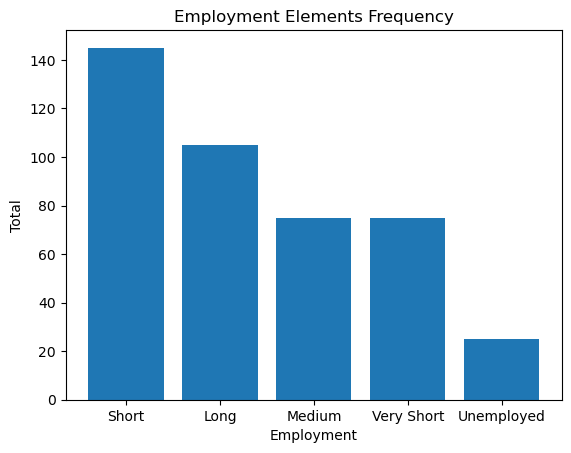

In [10]:
plt.xlabel('Employment')
plt.ylabel('Total')
plt.title('Employment Elements Frequency')
plt.bar(viz_Emp['Employment'], viz_Emp['Total'])

In [11]:
viz_Savings = initial_data[['SavingsAcct']].value_counts().reset_index(name='Total')
viz_Savings

,SavingsAcct,Total
0,Low,275
1,No Acct,66
2,MedLow,41
3,MedHigh,27
4,High,16


<BarContainer object of 5 artists>

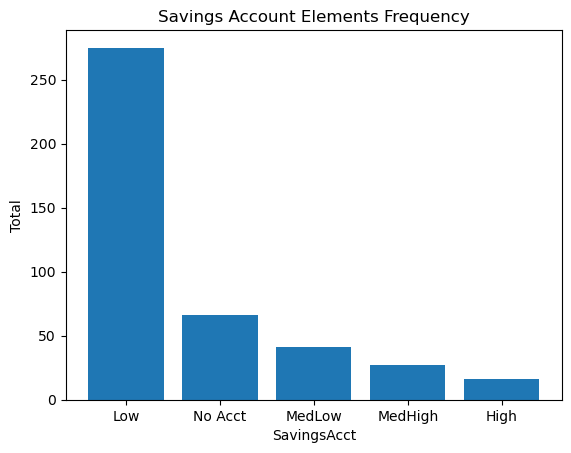

In [12]:
plt.xlabel('SavingsAcct')
plt.ylabel('Total')
plt.title('Savings Account Elements Frequency')
plt.bar(viz_Savings['SavingsAcct'], viz_Savings['Total'])

### Calculating Support and Confidence

In [13]:
sum_transactions1 = df['CreditStanding'].count() #getting the overall total

In [14]:
#Calculating support

sup_con_data = cons_data.copy()
sup_con_data['Support'] = sup_con_data['Count'].div(sum_transactions1)
sup_con_data


,Employment_SavingsAcct,Total,CreditStanding,Count,Support
0,Short Low,90,Bad,48,0.112941
1,Short Low,90,Good,42,0.098824
2,Very Short Low,58,Bad,35,0.082353
3,Long Low,62,Bad,35,0.082353
4,Long Low,62,Good,27,0.063529
5,Medium Low,49,Good,25,0.058824
6,Medium Low,49,Bad,24,0.056471
7,Very Short Low,58,Good,23,0.054118
8,Short No Acct,25,Good,15,0.035294
9,Long No Acct,22,Good,14,0.032941


In [15]:
#Calculate confidence
finalData = sup_con_data.copy()
finalData['Confidence'] = finalData['Count'].div(finalData['Total'])
finalData

,Employment_SavingsAcct,Total,CreditStanding,Count,Support,Confidence
0,Short Low,90,Bad,48,0.112941,0.533333
1,Short Low,90,Good,42,0.098824,0.466667
2,Very Short Low,58,Bad,35,0.082353,0.603448
3,Long Low,62,Bad,35,0.082353,0.564516
4,Long Low,62,Good,27,0.063529,0.435484
5,Medium Low,49,Good,25,0.058824,0.510204
6,Medium Low,49,Bad,24,0.056471,0.489796
7,Very Short Low,58,Good,23,0.054118,0.396552
8,Short No Acct,25,Good,15,0.035294,0.600000
9,Long No Acct,22,Good,14,0.032941,0.636364


### Generating Strong Association Rules

Setting the min support and min confidence

In [16]:
MinSupport = 0.02 # Minimum Support  = 2%
minConfidence = 0.60 #Minimum Condifence = 60%

Generating strong association rules

In [17]:
strongAssocRules = finalData.copy()
filter1 = strongAssocRules['Support'] >= MinSupport
filter2 = strongAssocRules['Confidence'] >= minConfidence
strongAssocRules = strongAssocRules.where(filter1 & filter2)
strongAssocRules = strongAssocRules.dropna()
strongAssocRules

,Employment_SavingsAcct,Total,CreditStanding,Count,Support,Confidence
2,Very Short Low,58.0,Bad,35.0,0.082353,0.603448
8,Short No Acct,25.0,Good,15.0,0.035294,0.600000
9,Long No Acct,22.0,Good,14.0,0.032941,0.636364
10,Medium No Acct,13.0,Good,11.0,0.025882,0.846154
12,Short MedLow,15.0,Bad,9.0,0.021176,0.600000


### Calculating the Minimal and Maximal Risk Loan

Rules with minimal risk loan

In [18]:
#Minimal Risk Loan
good = strongAssocRules[strongAssocRules['CreditStanding']=='Good']
good = good.drop(['Total', 'Count'], axis=1)
good
          

,Employment_SavingsAcct,CreditStanding,Support,Confidence
8,Short No Acct,Good,0.035294,0.600000
9,Long No Acct,Good,0.032941,0.636364
10,Medium No Acct,Good,0.025882,0.846154


Rules with maximal risk loan

In [19]:
#Maximal Risk Loan
bad = strongAssocRules[strongAssocRules['CreditStanding']=='Bad']
bad = bad.drop(['Total', 'Count'], axis=1)
bad

,Employment_SavingsAcct,CreditStanding,Support,Confidence
2,Very Short Low,Bad,0.082353,0.603448
12,Short MedLow,Bad,0.021176,0.600000


## Using Modified Data

### Data Preprocessing

In [20]:
#Creating new data as base data
data = df.copy()

#Combining CheckingAcct, CreditHist, and Purpose in a new column
#This is to help count the frequency of the antecedent
combine_columns = lambda row: f"{row['CheckingAcct']} {row['CreditHist']} {row['Purpose']}"
data['CheckingAcct_CreditHist_Purpose'] = data.apply(combine_columns, axis=1)
data

,CheckingAcct,CreditHist,Purpose,SavingsAcct,Employment,Gender,MaritalStatus,Housing,Job,Telephone,Foreign,Age,CreditStanding,CheckingAcct_CreditHist_Purpose
0,0Balance,Current,Small Appliance,Low,Short,M,Single,Own,Unskilled,Yes,Yes,23,Good,0Balance Current Small Appliance
1,0Balance,Current,Furniture,MedLow,Unemployed,M,Divorced,Own,Skilled,Yes,Yes,32,Bad,0Balance Current Furniture
2,No Acct,Bank Paid,Car New,Low,Long,M,Single,Own,Management,No,Yes,38,Bad,No Acct Bank Paid Car New
3,Low,Current,Furniture,Low,Short,M,Single,Own,Unskilled,Yes,Yes,36,Bad,Low Current Furniture
4,Low,Delay,Education,MedLow,Medium,M,Single,Rent,Skilled,No,Yes,31,Good,Low Delay Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,No Acct,Critical,Small Appliance,No Acct,Long,M,Single,Other,Skilled,Yes,Yes,35,Good,No Acct Critical Small Appliance
421,0Balance,Current,Furniture,No Acct,Long,M,Single,Own,Skilled,Yes,Yes,30,Bad,0Balance Current Furniture
422,0Balance,Current,Car New,No Acct,Long,F,Divorced,Own,Skilled,Yes,Yes,28,Bad,0Balance Current Car New
423,0Balance,Current,Car New,Low,Short,F,Divorced,Own,Skilled,No,Yes,28,Bad,0Balance Current Car New


### Calculating Frequencies

Following the rule: CheckingAcct, CreditHist, Purpose => Credit Standing, we arrive at the following unique combinations and their frequency

In [21]:
#Generating unique combinations and their frequency (Count)
newData = data[['CheckingAcct_CreditHist_Purpose', 'CreditStanding']].value_counts().reset_index(name='Count')
newData

,CheckingAcct_CreditHist_Purpose,CreditStanding,Count
0,0Balance Current Car New,Bad,19
1,No Acct Critical Small Appliance,Good,19
2,No Acct Current Small Appliance,Good,19
3,0Balance Current Furniture,Bad,14
4,0Balance Current Small Appliance,Bad,13
...,...,...,...
130,Low Delay Education,Good,1
131,Low Delay Furniture,Good,1
132,Low Critical Business,Bad,1
133,No Acct All Paid Car New,Bad,1


In [22]:
#Counting the frequency of unique combinations (Total) of rule antecedents  from the base data
unique_count = []

for i in newData['CheckingAcct_CreditHist_Purpose']:
    is_unique = data['CheckingAcct_CreditHist_Purpose'] == f"{i}"
    count = len(data[is_unique])
    unique_count.append(count)
unique_count
newData['Total'] = unique_count

newData = newData[['CheckingAcct_CreditHist_Purpose', 'Total', 'CreditStanding', 'Count']]
newData

,CheckingAcct_CreditHist_Purpose,Total,CreditStanding,Count
0,0Balance Current Car New,23,Bad,19
1,No Acct Critical Small Appliance,20,Good,19
2,No Acct Current Small Appliance,24,Good,19
3,0Balance Current Furniture,24,Bad,14
4,0Balance Current Small Appliance,17,Bad,13
...,...,...,...,...
130,Low Delay Education,2,Good,1
131,Low Delay Furniture,1,Good,1
132,Low Critical Business,3,Bad,1
133,No Acct All Paid Car New,1,Bad,1


### Visualizing Data

In [23]:
visualize =data[['CheckingAcct']].value_counts().reset_index(name='Total')
visualize

,CheckingAcct,Total
0,No Acct,146
1,0Balance,140
2,Low,115
3,High,24


<BarContainer object of 4 artists>

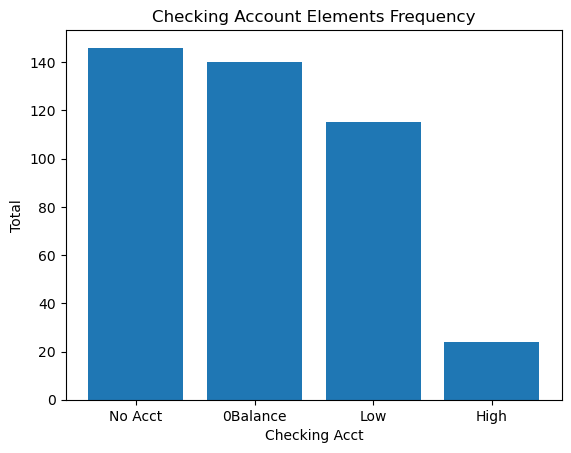

In [24]:
plt.xlabel('Checking Acct')
plt.ylabel('Total')
plt.title('Checking Account Elements Frequency')
plt.bar(visualize['CheckingAcct'], visualize['Total'])

In [25]:
visualize2 = data[['CreditHist']].value_counts().reset_index(name='Total')
visualize2

,CreditHist,Total
0,Current,236
1,Critical,110
2,Delay,35
3,Bank Paid,30
4,All Paid,14


<BarContainer object of 5 artists>

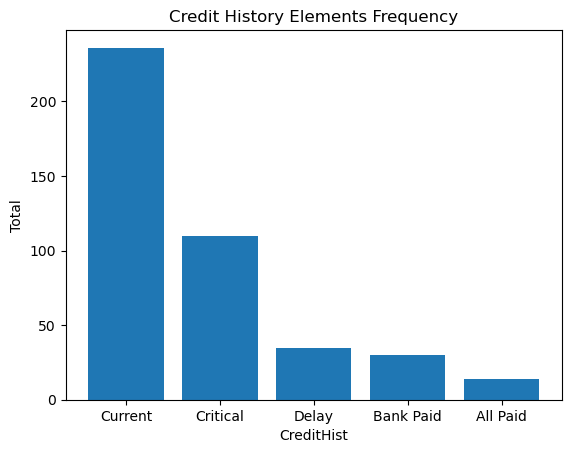

In [26]:
plt.xlabel('CreditHist')
plt.ylabel('Total')
plt.title('Credit History Elements Frequency')
plt.bar(visualize2['CreditHist'], visualize2['Total'])

In [27]:
visualize3 = data[['Purpose']].value_counts().reset_index(name='Total')
visualize3

,Purpose,Total
0,Small Appliance,105
1,Car New,104
2,Furniture,85
3,Business,44
4,Car Used,40
5,Education,23
6,Repairs,12
7,Other,6
8,Large Appliance,4
9,Retraining,2


<BarContainer object of 10 artists>

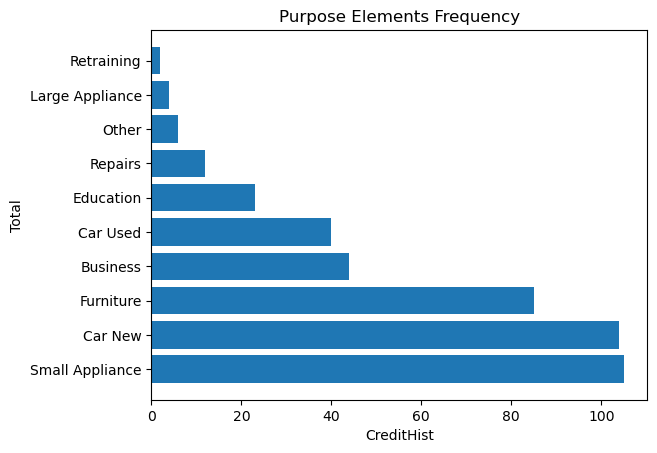

In [28]:
plt.xlabel('CreditHist')
plt.ylabel('Total')
plt.title('Purpose Elements Frequency')
plt.barh(visualize3['Purpose'], visualize3['Total'])

### Calculating Support and Confidence

In [29]:
#Calculating support

sup_con_data2 = newData.copy()
sum_transactions1 = df['CreditStanding'].count()
sup_con_data2['Support'] = sup_con_data2['Count'].div(sum_transactions1)
#cons_data['Support'] = sum_transactions1 / cons_data['Count']
sup_con_data2


,CheckingAcct_CreditHist_Purpose,Total,CreditStanding,Count,Support
0,0Balance Current Car New,23,Bad,19,0.044706
1,No Acct Critical Small Appliance,20,Good,19,0.044706
2,No Acct Current Small Appliance,24,Good,19,0.044706
3,0Balance Current Furniture,24,Bad,14,0.032941
4,0Balance Current Small Appliance,17,Bad,13,0.030588
...,...,...,...,...,...
130,Low Delay Education,2,Good,1,0.002353
131,Low Delay Furniture,1,Good,1,0.002353
132,Low Critical Business,3,Bad,1,0.002353
133,No Acct All Paid Car New,1,Bad,1,0.002353


In [30]:
#Calculate confidence
newFinalData = sup_con_data2.copy()
newFinalData['Confidence'] = newFinalData['Count'].div(newFinalData['Total'])
newFinalData

,CheckingAcct_CreditHist_Purpose,Total,CreditStanding,Count,Support,Confidence
0,0Balance Current Car New,23,Bad,19,0.044706,0.826087
1,No Acct Critical Small Appliance,20,Good,19,0.044706,0.950000
2,No Acct Current Small Appliance,24,Good,19,0.044706,0.791667
3,0Balance Current Furniture,24,Bad,14,0.032941,0.583333
4,0Balance Current Small Appliance,17,Bad,13,0.030588,0.764706
...,...,...,...,...,...,...
130,Low Delay Education,2,Good,1,0.002353,0.500000
131,Low Delay Furniture,1,Good,1,0.002353,1.000000
132,Low Critical Business,3,Bad,1,0.002353,0.333333
133,No Acct All Paid Car New,1,Bad,1,0.002353,1.000000


### Generating Strong Association Rule

In [31]:
strongAssocRules2 = newFinalData.copy()
#Discarding rules that are less that the min support and condfidence
filter1 = strongAssocRules2['Support'] >= MinSupport
filter2 = strongAssocRules2['Confidence'] >= minConfidence
strongAssocRules2 = strongAssocRules2.where(filter1 & filter2)
strongAssocRules2 = strongAssocRules2.dropna()
strongAssocRules2

,CheckingAcct_CreditHist_Purpose,Total,CreditStanding,Count,Support,Confidence
0,0Balance Current Car New,23.0,Bad,19.0,0.044706,0.826087
1,No Acct Critical Small Appliance,20.0,Good,19.0,0.044706,0.950000
2,No Acct Current Small Appliance,24.0,Good,19.0,0.044706,0.791667
4,0Balance Current Small Appliance,17.0,Bad,13.0,0.030588,0.764706
5,No Acct Current Furniture,16.0,Good,11.0,0.025882,0.687500
6,No Acct Current Car New,15.0,Good,11.0,0.025882,0.733333
10,Low Current Furniture,13.0,Bad,9.0,0.021176,0.692308


### Calculating Minimal and Maximal Loan

In [32]:
#Minimal Risk Loan
good = strongAssocRules2[strongAssocRules2['CreditStanding']=='Good']
good = good.drop(['Total', 'Count'], axis=1)
good
          

,CheckingAcct_CreditHist_Purpose,CreditStanding,Support,Confidence
1,No Acct Critical Small Appliance,Good,0.044706,0.950000
2,No Acct Current Small Appliance,Good,0.044706,0.791667
5,No Acct Current Furniture,Good,0.025882,0.687500
6,No Acct Current Car New,Good,0.025882,0.733333


In [33]:
#Maximal Risk Loan
bad = strongAssocRules2[strongAssocRules2['CreditStanding']=='Bad']
bad = bad.drop(['Total', 'Count'], axis=1)
bad

,CheckingAcct_CreditHist_Purpose,CreditStanding,Support,Confidence
0,0Balance Current Car New,Bad,0.044706,0.826087
4,0Balance Current Small Appliance,Bad,0.030588,0.764706
10,Low Current Furniture,Bad,0.021176,0.692308


In [34]:
print(initial_data['CheckingAcct'].unique())
print(initial_data['CreditHist'].unique())
print(initial_data['Purpose'].unique())

['0Balance' 'No Acct' 'Low' 'High']
['Current' 'Bank Paid' 'Delay' 'Critical' 'All Paid']
['Small Appliance' 'Furniture' 'Car New' 'Education' 'Business' 'Car Used'
 'Repairs' 'Other' 'Retraining' 'Large Appliance']
